<a href="https://colab.research.google.com/github/sanjit1995/SignsLanguage_MNIST/blob/master/SignLanguageMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pickle
from matplotlib import pyplot as plt

In [0]:
train_data = np.genfromtxt('/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/sign_mnist_train.csv', delimiter=',', skip_header=1)
test_data = np.genfromtxt('/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/sign_mnist_test.csv', delimiter=',', skip_header=1)

Capture from camera

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

To test an image

In [0]:
num2alpha = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 10: "K", 11: "L", 12: "M", 13: "N",
    14: "O", 15: "P", 16: "Q", 17: "R", 18: "S", 19: "T", 20: "U", 21: "V", 22: "W", 23: "X", 24: "Y"
}

(1, 28, 28, 1)
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.55775198e-32 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.08196795e-14 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.21046330e-35 1.30239168e-22 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]
0
A


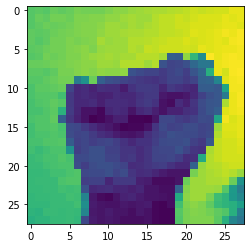

In [47]:
# load the model from disk
import pickle
filename = '/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/signLanguage_modelCNN_4.pkl'
#model = pickle.load(open(filename, 'rb'))

num2alpha_mod = {
    0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G", 7: "H", 8: "I", 9: "K", 10: "L", 11: "M", 12: "N",
    13: "O", 14: "P", 15: "Q", 16: "R", 17: "S", 18: "T", 19: "U", 20: "V", 21: "W", 22: "X", 23: "Y"
}

#im = cv2.imread('/content/female-hand-showing-three-fingers-isolated-female-hand-showing-three-fingers-isolated-white-background-173246468.jpg', cv2.IMREAD_GRAYSCALE)
im = cv2.imread('/content/download.jpg', cv2.IMREAD_GRAYSCALE)
im_new = cv2.resize(im, (28, 28))
im_final = im_new.reshape(1, 28, 28, 1)
plt.imshow(im_new)
print(im_final.shape)

#predicted
ind = np.argmax(model.predict(im_final))
print(model.predict(im_final))
print(ind)
pred = num2alpha_mod[ind]
print(pred)

In [0]:
y_image_test[y_image_test[2] == 1]

In [0]:
cv2_imshow(cv2.imread('/content/v_sample.png', cv2.IMREAD_GRAYSCALE))

In [11]:
ind = model.predict(im)
ind

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

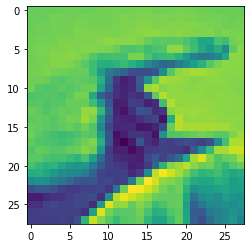

In [100]:
value1 = test_data[0, 1:].astype(np.int)

reshaped = np.reshape(value1, (28, 28))

#cv2_imshow(reshaped)
plt.imshow(reshaped)

In [101]:
test_data[0, 0].astype(np.int)

6

In [102]:
#original
num2alpha[test_data[0, 0].astype(np.int)]

'G'

In [0]:
#predicted
ind = max(model.predict(reshaped.reshape(1, 28, 28, 1)))
pred = num2alpha[y_image_test.columns[ind]]
pred

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
y_image_test.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64')

In [0]:
reshaped.shape

(28, 28)

In [99]:
model.predict(reshaped.reshape(1, 28, 28, 1))

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.5038373e-35, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.6432306e-19, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 3.1884817e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [0]:
y_image_test.columns[9]

10

-----------------------------------------------------

In [0]:
y_train = train_data[:, 0].astype(np.int) #get all image labels(train)
x_train = train_data[:, 1:].astype(np.int) #get all image pixels(train)
y_test = test_data[:, 0].astype(np.int) #get all image labels(test)
x_test = test_data[:, 1:].astype(np.int) #get all image pixels(test)

In [27]:
x_train.shape

(27455, 784)

In [28]:
y_train.shape

(27455,)

In [29]:
x_test.shape

(7172, 784)

In [30]:
y_test.shape

(7172,)

In [0]:
# Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

In [0]:
# reshape data for the model
x_image_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_image_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [34]:
x_image_train.shape

(27455, 28, 28, 1)

In [13]:
len(np.unique(y_train))

24

In [0]:
y_image_train = pd.DataFrame(y_train)
y_image_train.columns = ['label']
y_image_train = pd.get_dummies(y_image_train['label'], drop_first=False)

In [0]:
y_image_test = pd.DataFrame(y_test)
y_image_test.columns = ['label']
y_image_test = pd.get_dummies(y_image_test['label'], drop_first=False)

In [16]:
y_test.shape

(7172,)

In [0]:
y_train.head(1)

In [18]:
y_train.shape

(27455,)

In [0]:
y_train

In [111]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D

model = Sequential()
model.add(Conv2D(128, kernel_size=3, strides=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=1, strides=(2, 2), activation='relu'))
#model.add(Dropout(0.3))
#model.add(Conv2D(256, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dense(24, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.fit(x_image_train, y_image_train, batch_size = 10, epochs = 20, validation_split = 0.2, shuffle=True)
#model.fit(x_image_train, y_image_train, epochs = 5, validation_split = 0.2, shuffle=True)

Train on 21964 samples, validate on 5491 samples
Epoch 1/20
21964/21964 [==============================] - 9s 392us/step - loss: 3.0807 - accuracy: 0.0907 - val_loss: 2.8914 - val_accuracy: 0.1628
Epoch 2/20
21964/21964 [==============================] - 9s 399us/step - loss: 2.7920 - accuracy: 0.1799 - val_loss: 2.7043 - val_accuracy: 0.2096
Epoch 3/20
21964/21964 [==============================] - 8s 382us/step - loss: 2.6428 - accuracy: 0.2165 - val_loss: 2.5649 - val_accuracy: 0.2397
Epoch 4/20
21964/21964 [==============================] - 9s 391us/step - loss: 2.5177 - accuracy: 0.2528 - val_loss: 2.4434 - val_accuracy: 0.2659
Epoch 5/20
21964/21964 [==============================] - 9s 404us/step - loss: 2.4046 - accuracy: 0.2774 - val_loss: 2.3407 - val_accuracy: 0.3103
Epoch 6/20
21964/21964 [==============================] - 8s 378us/step - loss: 2.3029 - accuracy: 0.3099 - val_loss: 2.2412 - val_accuracy: 0.3327
Epoch 7/20
21964/21964 [==============================] - 9s 40

In [107]:
test_loss, test_acc = model.evaluate(x_image_test,  y_image_test, verbose=2)
print(test_loss)
print('\nTest accuracy:', test_acc)

0.17029008342444532

Test accuracy: 0.9583318829536438


In [0]:
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/signLanguage_modelCNN_6.pkl'
pickle.dump(model, open(filename, 'wb'))

In [11]:
# load the model from disk
filename = '/content/drive/My Drive/Colab Notebooks/data/SignLanguageMNIST/signLanguage_modelCNN_6.pkl'
model = pickle.load(open(filename, 'rb'))

Using TensorFlow backend.


In [59]:
result = model.evaluate(x_image_test,  y_image_test, verbose=2)
print(result)

[0.17053456869593428, 0.9583318829536438]


In [0]:
print(x_test[0, 1:])
result_pred = np.argmax(model.predict(x_image_test[0].reshape(1, 28, 28, 1)))
result_pred

In [0]:
y_image_test_cp = np.array(y_image_test)
y_image_test_cp = np.array([np.where(r==1)[0][0] for r in y_image_test_cp])

In [57]:
y_image_test_cp

array([6, 5, 9, ..., 2, 4, 2])

In [58]:
result_pred

array([15, 15,  6, ..., 13,  0,  8])

Confusion Matrix

In [64]:
matches = 0
no_matches = 0
no_matches_arr = []
for i in range(0,len(y_image_test_cp)):
  if(y_image_test_cp[i] == result_pred[i]):
    matches += 1
  else:
    no_matches_arr.append(i)
    no_matches +=1

print(matches, no_matches)
print(no_matches_arr)

538 6634
[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 213, 214, 215, 216, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240,

In [18]:
cm_labels = []
for i in range(0, 24):
  cm_labels.append(i)
cm_labels = np.array(cm_labels)
cm_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [19]:
cm_labels_alpha = np.array(["A",  "B",  "C",  "D",  "E",  "F",  "G",  "H",  "I",  "K", "L",  "M", "N",  "O", "P",  "Q", "R",
       "S",  "T", "U",  "V", "W",  "X", "Y"])
cm_labels_alpha

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

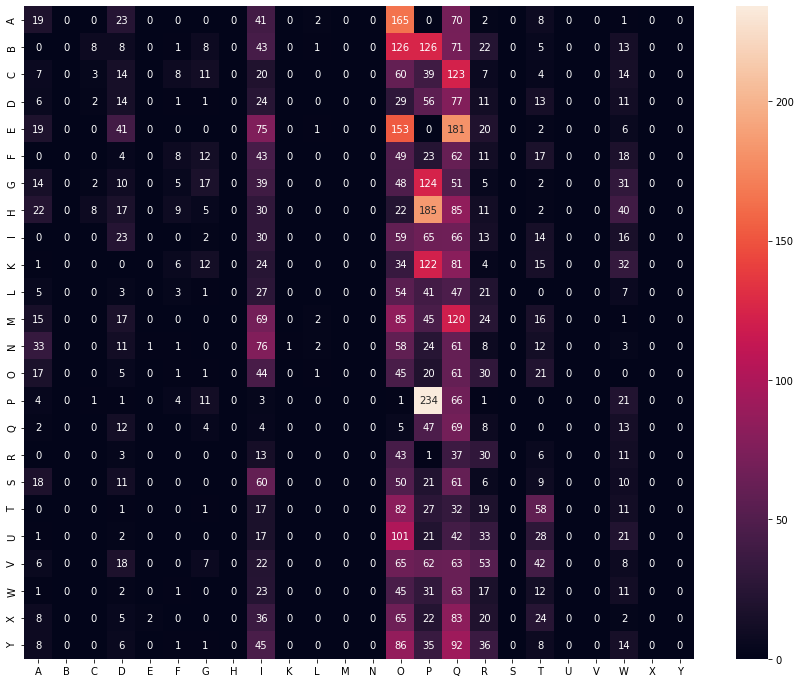

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_image_test_cp, result_pred, labels=cm_labels)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=cm_labels_alpha, yticklabels=cm_labels_alpha)

In [61]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 6, 6, 5)           50        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 5)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 10)          60        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                264       
Total params: 374
Trainable params: 374
Non-trainable params: 0
________________________________________________________

In [26]:
model.input

<tf.Tensor 'conv2d_37_input:0' shape=(None, 28, 28, 1) dtype=float32>

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
activations = activation_model.predict(reshaped.reshape(1, 28, 28, 1)) # Returns a list of five Numpy arrays: one array per layer activation

In [0]:
activations

In [0]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


For Optimization

In [0]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=128, max_value=512, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=64, max_value=512, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ))
    model.add(keras.layers.Dense(24, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='output1',
    project_name="Signs_MNIST"
)

tuner.search(x_image_train, y_train, epochs=3, validation_split=0.2, shuffle=True)

model = tuner.get_best_models(num_models=1)[0]

model.summary()

In [0]:
model.fit(x_image_train, y_train, epochs=10, validation_split=0.1, initial_epoch=3)